# Color and Gradient Pipeline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pickle

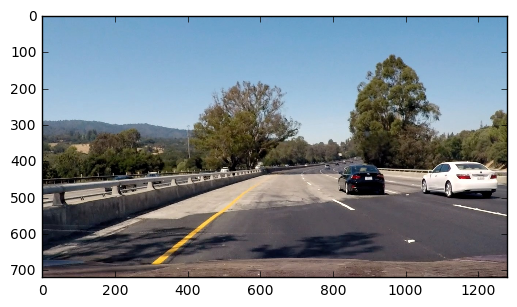

In [3]:
img = mpimg.imread('./test_images/test4.jpg')
plt.imshow(img)

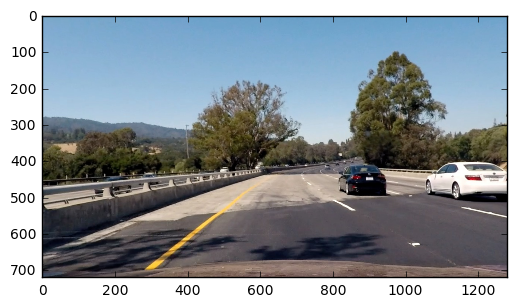

In [4]:
#Undistort the image .. because
camera_cal = pickle.load( open( "camera_cal.p", "rb" ) )
ret = camera_cal[0]
mtx = camera_cal[1]
dist = camera_cal[2]
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

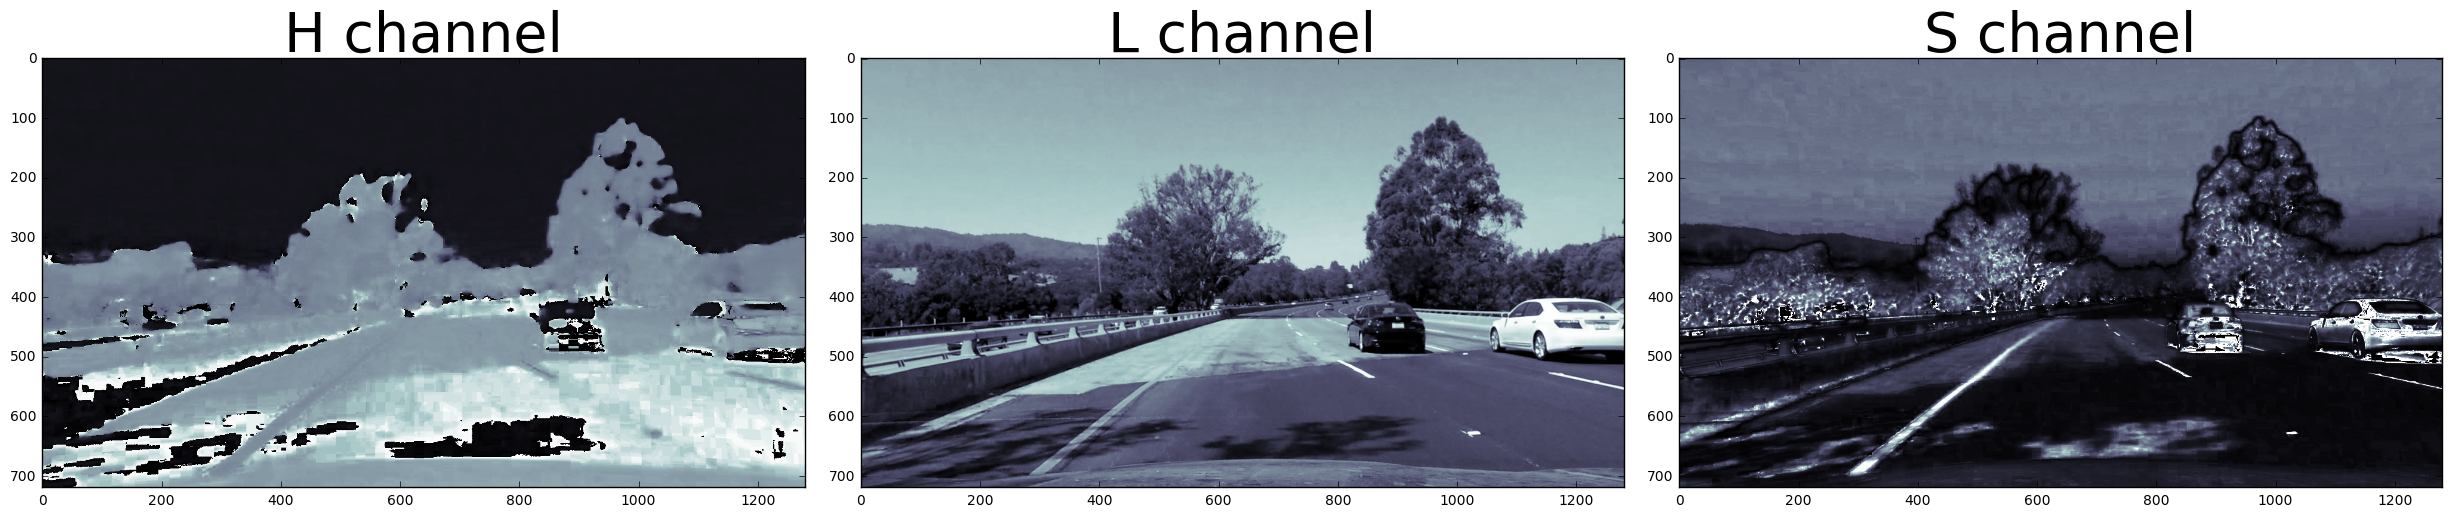

In [5]:
#Look at some Color channels / spaces
#HLS

hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS).astype(np.float)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(hls[:,:,0],cmap='bone')
ax1.set_title('H channel', fontsize=40)

ax2.imshow(hls[:,:,1],cmap='bone')
ax2.set_title('L channel', fontsize=40)

ax3.imshow(hls[:,:,2],cmap='bone')
ax3.set_title('S channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

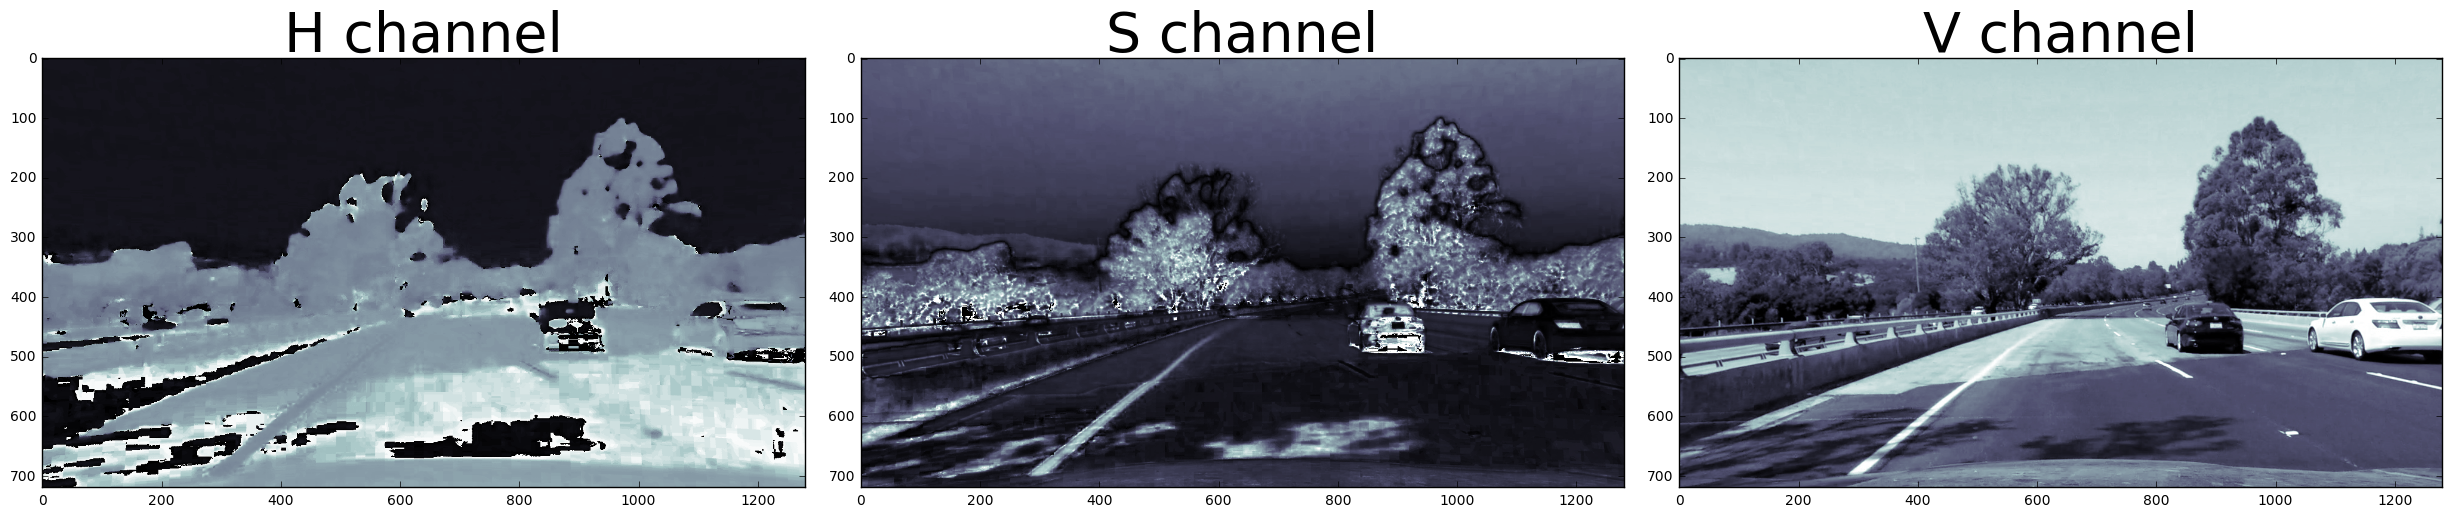

In [6]:
#HSV

hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV).astype(np.float)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(hsv[:,:,0],cmap='bone')
ax1.set_title('H channel', fontsize=40)

ax2.imshow(hsv[:,:,1],cmap='bone')
ax2.set_title('S channel', fontsize=40)

ax3.imshow(hsv[:,:,2],cmap='bone')
ax3.set_title('V channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

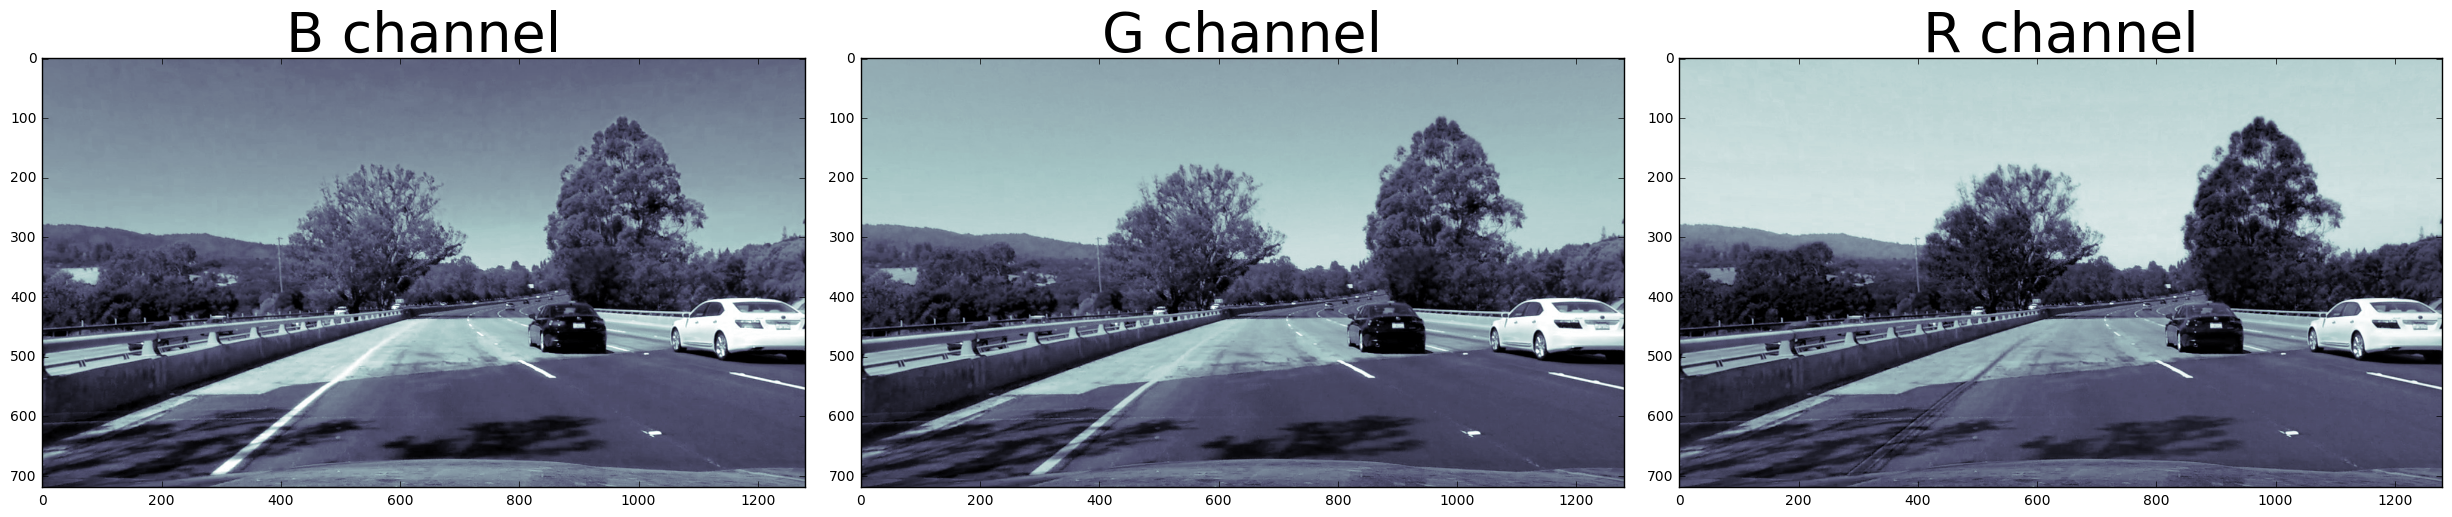

In [7]:
#BGR


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(dst[:,:,0],cmap='bone')
ax1.set_title('B channel', fontsize=40)

ax2.imshow(dst[:,:,1],cmap='bone')
ax2.set_title('G channel', fontsize=40)

ax3.imshow(dst[:,:,2],cmap='bone')
ax3.set_title('R channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

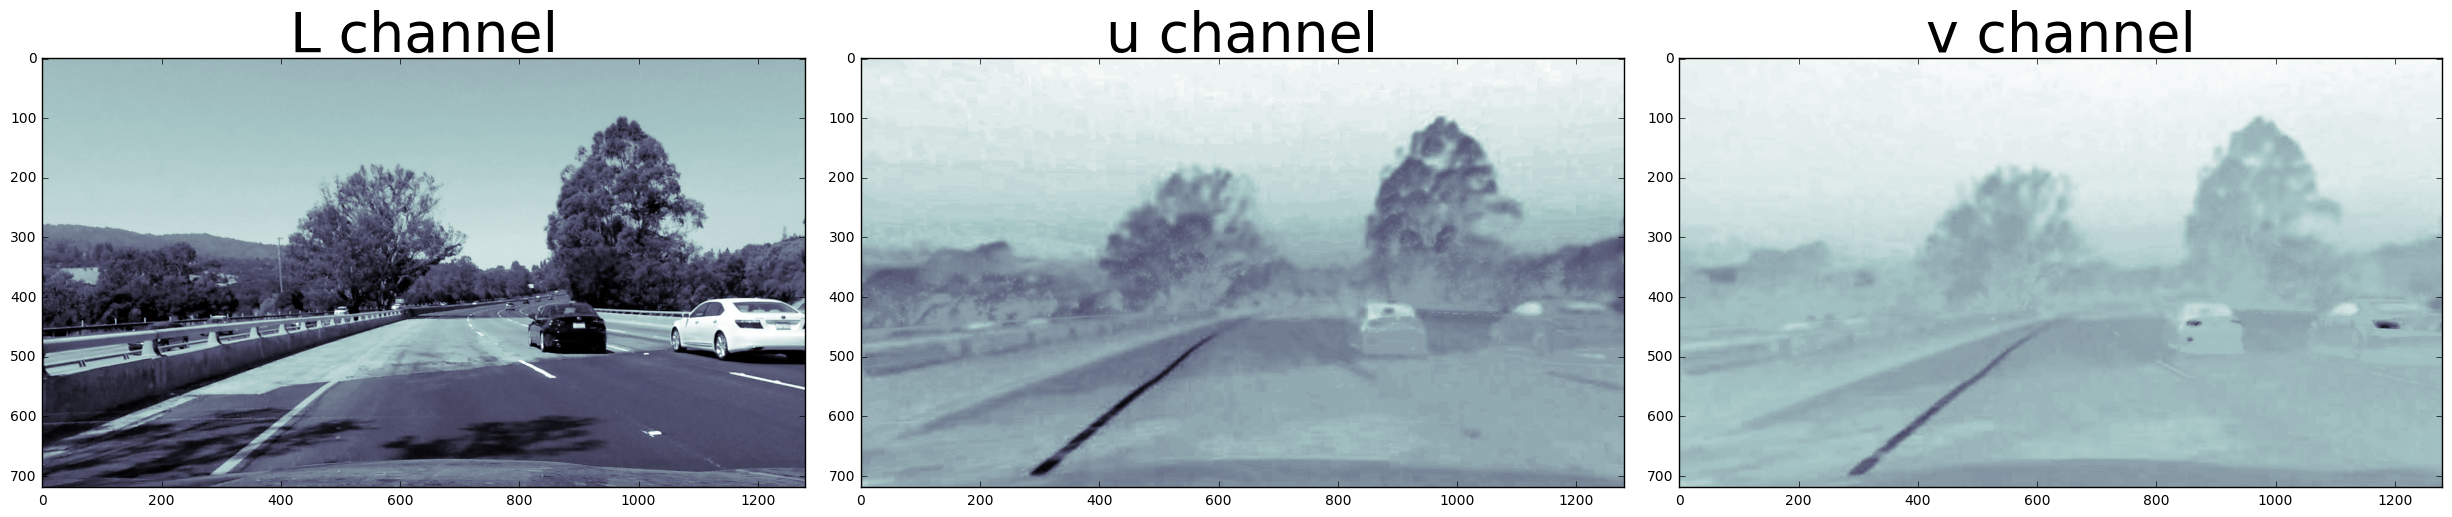

In [8]:
#Luv

luv = cv2.cvtColor(dst, cv2.COLOR_BGR2Luv).astype(np.float)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(luv[:,:,0],cmap='bone')
ax1.set_title('L channel', fontsize=40)

ax2.imshow(luv[:,:,1],cmap='bone')
ax2.set_title('u channel', fontsize=40)

ax3.imshow(luv[:,:,2],cmap='bone')
ax3.set_title('v channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

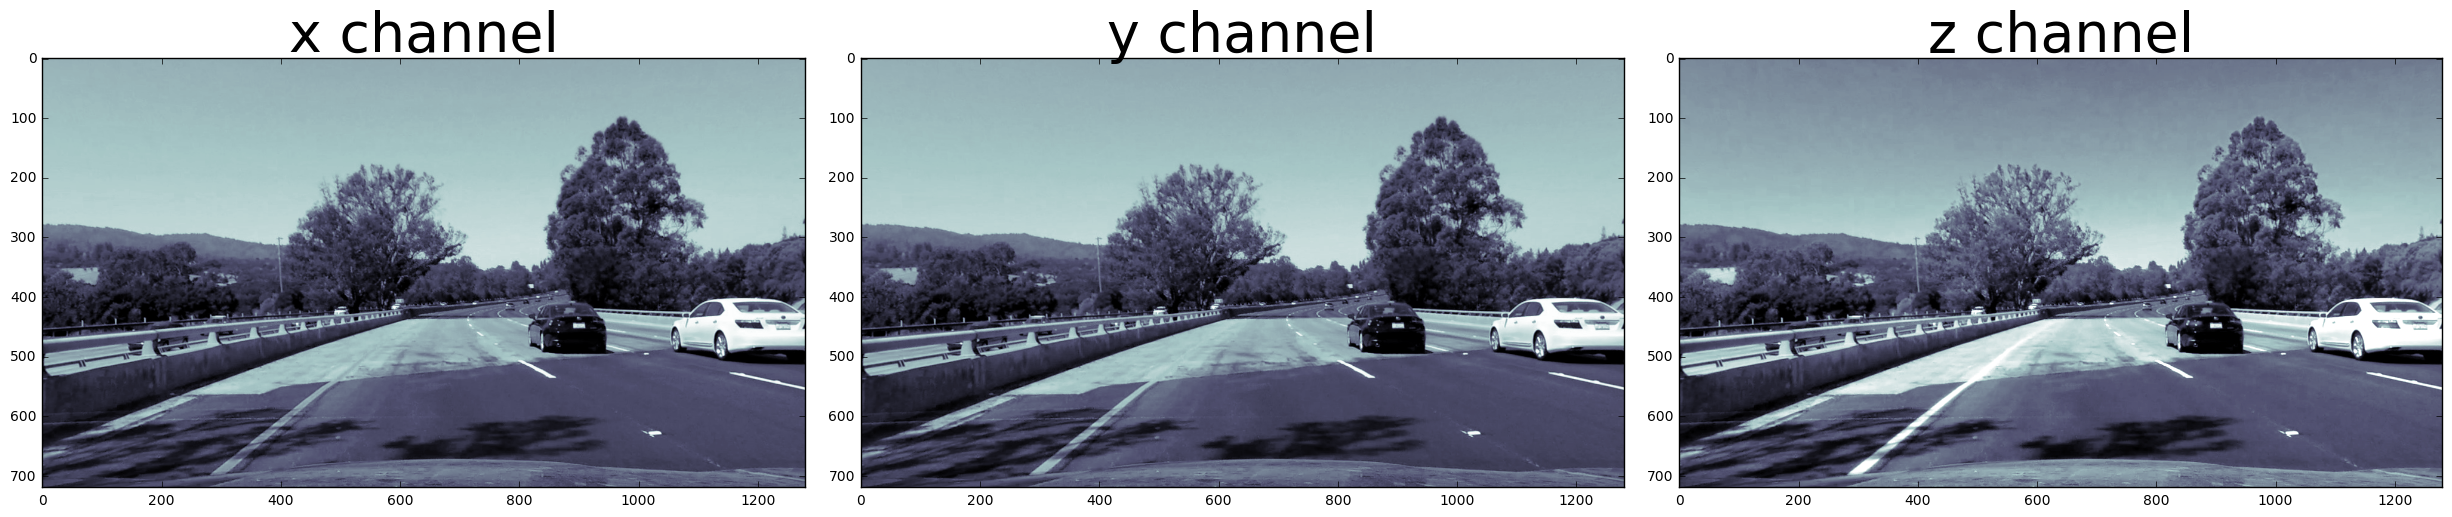

In [9]:
#XYZ

xyz = cv2.cvtColor(dst, cv2.COLOR_BGR2XYZ).astype(np.float)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(xyz[:,:,0],cmap='bone')
ax1.set_title('x channel', fontsize=40)

ax2.imshow(xyz[:,:,1],cmap='bone')
ax2.set_title('y channel', fontsize=40)

ax3.imshow(xyz[:,:,2],cmap='bone')
ax3.set_title('z channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Some of the winners from looking at the channels of different color spaces appear to be:

HLS: S

Luv: u

possibly: HSV: V and XYZ: Z


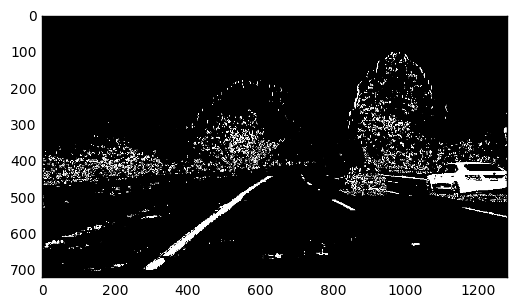

In [50]:


sx_thresh=(30,75)
s_thresh=(170, 230)
u_thresh=(0,80)
z_thresh=(240,255)

# img = np.copy(dst)
#Convert to HLS color and separate channels
# hls = cv2.cvtColor(img, cv2.COLOR_BGR2Luv).astype(np.float)
# h_channel = hls[:,:,0]
# l_channel = hls[:,:,1]
# s_channel = hls[:,:,2]

sobel_kernel = 5

sobelx = cv2.Sobel(hls[:,:,2], cv2.CV_64F,1,0,ksize = sobel_kernel)
abs_sobelx = np.absolute(sobelx)
scaled_sobel=np.uint8(255*abs_sobelx/np.max(abs_sobelx))

sobelxx = cv2.Sobel(abs_sobelx, cv2.CV_64F,1,0,ksize = 3)
abs_sobelxx = np.absolute(sobelxx)

#Threshold sx gradient
sx_binary = np.zeros_like(hls[:,:,2])
sx_binary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] =1

#Threshold s_color channel
s_binary = np.zeros_like(hls[:,:,2])
s_binary[(hls[:,:,2] >= s_thresh[0]) & (hls[:,:,2] <= s_thresh[1])] = 1

#Threshold u_color channel
u_binary = np.zeros_like(luv[:,:,1])
u_binary[(luv[:,:,1] >= u_thresh[0]) & (luv[:,:,1] <= u_thresh[1])] = 1

#Threshold z_color channel
z_binary = np.zeros_like(xyz[:,:,2])
z_binary[(xyz[:,:,2] >= z_thresh[0]) & (xyz[:,:,2] <= z_thresh[1])] = 1


uz_binary = np.zeros_like(xyz[:,:,2])
uz_binary[(u_binary ==1) | (z_binary==1)]=1
#Stach each channel
color_binary = np.dstack((uz_binary, sx_binary, s_binary))

#OR Each channel
OR_binary = np.zeros_like(xyz[:,:,2])
OR_binary[(uz_binary ==1) | (sx_binary ==1) | (s_binary ==1)] =1

#AND Each channel
# AND_binary = np.zeros_like(xyz[:,:,2])
# AND_binary[(uz_binary ==1) | (sx_binary ==1) & (c_binary ==1)] =1

plt.imshow(OR_binary,cmap='gray')


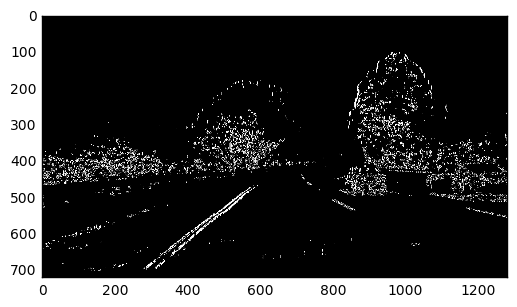

In [51]:
plt.imshow(sx_binary,cmap='gray')

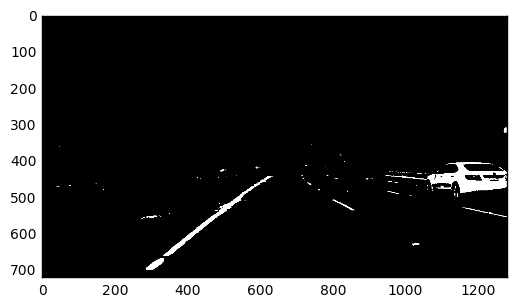

In [52]:
plt.imshow(uz_binary,cmap='gray')

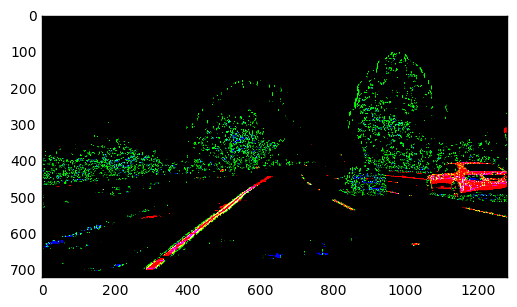

In [53]:
plt.imshow(color_binary)

Other considerations:
-Use direction of the gradient
-Use second derivative